# Bibliotecas e Funções

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import collections


BENFORD_PERCENTAGES = [0, 0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]

def calculate(data):

    """
    Calculates a set of values from the numeric list
    input data showing how closely the first digits
    fit the Benford Distribution.
    Results are returned as a list of dictionaries.
    """

    results = []

    first_digits = list(map(lambda n: str(n)[0], data))
    first_digit_frequencies = collections.Counter(first_digits)

    for n in range(1, 10):

        data_frequency = first_digit_frequencies[str(n)]
        data_frequency_percent = data_frequency / len(data)
        benford_frequency = len(data) * BENFORD_PERCENTAGES[n]
        benford_frequency_percent = BENFORD_PERCENTAGES[n]
        difference_frequency = data_frequency - benford_frequency
        difference_frequency_percent = data_frequency_percent - benford_frequency_percent

        results.append({"n": n,
                        "data_frequency":               data_frequency,
                        "data_frequency_percent":       data_frequency_percent,
                        "benford_frequency":            benford_frequency,
                        "benford_frequency_percent":    benford_frequency_percent,
                        "difference_frequency":         difference_frequency,
                        "difference_frequency_percent": difference_frequency_percent})

    return results

BENFORD_PERCENTAGES_2ND_DIGIT = [0.12,	0.114, 0.109,	0.104,	0.1,	0.097,	0.093,	0.09,	0.088,	0.085]
def calculate_second_digit(data):

    """
    Calculates a set of values from the numeric list
    input data showing how closely the second digits
    fit the Benford Distribution.
    Results are returned as a list of dictionaries.
    """

    results = []

    second_digits = list(map(lambda n: str(n)[1], data))
    second_digit_frequencies = collections.Counter(second_digits)

    for n in range(10):

        data_frequency = second_digit_frequencies[str(n)]
        data_frequency_percent = data_frequency / len(data)
        benford_frequency = len(data) * BENFORD_PERCENTAGES_2ND_DIGIT[n]
        benford_frequency_percent = BENFORD_PERCENTAGES_2ND_DIGIT[n]
        difference_frequency = data_frequency - benford_frequency
        difference_frequency_percent = data_frequency_percent - benford_frequency_percent

        results.append({"n": n,
                        "data_frequency":               data_frequency,
                        "data_frequency_percent":       data_frequency_percent,
                        "benford_frequency":            benford_frequency,
                        "benford_frequency_percent":    benford_frequency_percent,
                        "difference_frequency":         difference_frequency,
                        "difference_frequency_percent": difference_frequency_percent})

    return results

BENFORD_PERCENTAGES_1ST_AND_2ND_DIGITS = [0]*10 + [np.log10(1+1/s) for s in range(10, 100)]
def calculate_first_and_second_digits(data):

    """
    Calculates a set of values from the numeric list
    input data showing how closely the second digits
    fit the Benford Distribution.
    Results are returned as a list of dictionaries.
    """

    results = []

    leading_digits = list(map(lambda n: str(n)[:2], data))
    leading_digit_frequencies = collections.Counter(leading_digits)

    for n in range(10, 100):

        data_frequency = leading_digit_frequencies[str(n)]
        data_frequency_percent = data_frequency / len(data)
        benford_frequency = len(data) * BENFORD_PERCENTAGES_1ST_AND_2ND_DIGITS[n]
        benford_frequency_percent = BENFORD_PERCENTAGES_1ST_AND_2ND_DIGITS[n]
        difference_frequency = data_frequency - benford_frequency
        difference_frequency_percent = data_frequency_percent - benford_frequency_percent

        results.append({"n": n,
                        "data_frequency":               data_frequency,
                        "data_frequency_percent":       data_frequency_percent,
                        "benford_frequency":            benford_frequency,
                        "benford_frequency_percent":    benford_frequency_percent,
                        "difference_frequency":         difference_frequency,
                        "difference_frequency_percent": difference_frequency_percent})

    return results


def get_random_data():

    """
    Returns a list of 1000 numbers approximately
    following the uniform distribution NOT the
    Benford Distribution.
    """

    random_data = [0] * 1000

    random_data = list(map(lambda n: n + random.randint(1, 100000), random_data))

    return random_data


def get_benford_data():

    """
    Returns a list of about 1000 numbers
    approximately following the Benford Distribution.
    """

    benford_data = []

    for first_digit in range(1, 10):
        random_factor = random.uniform(0.8, 1.2)
        for num_count in range(1, int(1000 * BENFORD_PERCENTAGES[first_digit] * random_factor)):
            start = first_digit * 1000
            benford_data.append(random.randint(start, start + 1000))

    return benford_data


def print_as_table(benford_table):

    width = 59

    print("-" * width)
    print("|   |      Data       |    Benford      |    Difference   |")
    print("| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |")
    print("-" * width)

    for item in benford_table:

        print("| {} | {:6.0f} | {:6.2f} | {:6.0f} | {:6.2f} | {:6.0f} | {:6.2f} |".format(item["n"],
                                   item["data_frequency"],
                                   item["data_frequency_percent"] * 100,
                                   item["benford_frequency"],
                                   item["benford_frequency_percent"] * 100,
                                   item["difference_frequency"],
                                   item["difference_frequency_percent"] * 100))

    print("-" * width)


def print_as_graph(benford_table):

    if len(benford_table) > 10:
      fig = plt.figure(figsize=(18,5))
      for item in benford_table:
        plt.bar(item["n"], item["benford_frequency_percent"]*100, width=.5, color='green', figure=fig)
        plt.bar(item["n"]+0.5, item["data_frequency_percent"]*100, width=.5, color='red', figure=fig)
      plt.show()
    else:
      REDBG = "\x1B[41m"
      GREENBG = "\x1B[42m"
      RESET = "\x1B[0m"

      print("  0%       10%       20%       30%       40%       50%       60%       70%       80%       90%       100%")
      print("  |         |         |         |         |         |         |         |         |         |         |\n")

      for item in benford_table:

          print(" {} {}\n   {}\n  ".format(str(item["n"]),
                                           GREENBG + (" " * int(round(item["benford_frequency_percent"] * 100))) + RESET,
                                           REDBG + (" " * int(round(item["data_frequency_percent"] * 100))) + RESET))


# Carregando os dados

In [ ]:
df = pd.read_excel('BASE+DE+DADOS+DESEMBOLSO_2020.xlsx')

In [ ]:
df.head()

# AED

## Tamanho da base de dados

In [ ]:
print( 'Number of Rows: {}'.format( df.shape[0] ) )
print( 'Number of Columns: {}'.format( df.shape[1] ) )

NameError: ignored

## Tipos dos dados

In [ ]:
df.dtypes

ANO                         int64
MÊS                        object
FORMA DE APOIO             object
PRODUTO                    object
INSTRUMENTO FINANCEIRO     object
INOVAÇÃO                   object
PORTE DE EMPRESA           object
REGIÃO                     object
UF                         object
MUNICÍPIO                  object
MUNICÍPIO - CÓDIGO          int64
SETOR CNAE                 object
SUBSETOR CNAE AGRUPADO     object
SETOR BNDES                object
SUBSETOR BNDES             object
DESEMBOLSOS\n(R$)         float64
dtype: object

## Dados Faltantes

In [ ]:
df.isna().sum()

ANO                       0
MÊS                       0
FORMA DE APOIO            0
PRODUTO                   0
INSTRUMENTO FINANCEIRO    0
INOVAÇÃO                  0
PORTE DE EMPRESA          0
REGIÃO                    0
UF                        0
MUNICÍPIO                 0
MUNICÍPIO - CÓDIGO        0
SETOR CNAE                0
SUBSETOR CNAE AGRUPADO    0
SETOR BNDES               0
SUBSETOR BNDES            0
DESEMBOLSOS\n(R$)         0
dtype: int64

Não temos dados faltantes.

## Descrição Estatística

In [ ]:
num_attributes = df.select_dtypes( include=['int64', 'float64', 'int32', 'float32'] )
cat_attributes = df.select_dtypes( exclude=['int64', 'float64', 'int32', 'float32'] )

### Dados Numericos

In [ ]:
# Central Tendency - mean, meadin
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,ANO,2020.0,2.020000e+03,0.000000e+00,2.020000e+03,2020.00,0.000000e+00,0.000000,0.000000
1,MUNICÍPIO - CÓDIGO,1100015.0,9.999998e+06,8.899983e+06,3.861417e+06,4113452.00,9.956801e+05,1.044590,9.799948
2,DESEMBOLSOS\n(R$),0.8,2.505344e+09,2.505344e+09,5.818431e+05,91194.82,1.351463e+07,117.912563,17959.502142


In [ ]:
df['DESEMBOLSOS\n(R$)'].max(), df['DESEMBOLSOS\n(R$)'].min()

(2505343944.74, 0.8)

### Dados Categoricos (Fazer graficos aqui!)

In [ ]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

MÊS                         12
FORMA DE APOIO               2
PRODUTO                      9
INSTRUMENTO FINANCEIRO     107
INOVAÇÃO                     2
PORTE DE EMPRESA             4
REGIÃO                       5
UF                          27
MUNICÍPIO                 4273
SETOR CNAE                   4
SUBSETOR CNAE AGRUPADO      44
SETOR BNDES                  4
SUBSETOR BNDES              20
dtype: int64

In [ ]:
cat_attributes['REGIÃO'].unique()

array(['SUDESTE             ', 'SUL                 ',
       'CENTRO OESTE        ', 'NORDESTE            ',
       'NORTE               '], dtype=object)

In [ ]:
cat_attributes['SETOR BNDES'].unique()

array(['COMÉRCIO E SERVIÇOS', 'INDUSTRIA', 'AGROPECUÁRIA',
       'INFRAESTRUTURA'], dtype=object)

# Divisão do dataset

## Região Nordeste e Setor Comércio e Serviços

In [ ]:
df1 = df[df['REGIÃO'] == 'NORDESTE            ']
df1 = df1[df1['SETOR BNDES'] == 'COMÉRCIO E SERVIÇOS']
# benford's law only applies to numbers with numbers that have at least 4 digits
df1 = df1[df1['DESEMBOLSOS\n(R$)'] >= 1000]
df1.shape

(4419, 16)

In [ ]:
print("-----------------")
print("| codedrome.com |")
print("| Benford's Law |")
print("-----------------\n")

benford_table = calculate(df1['DESEMBOLSOS\n(R$)'])
print_as_table(benford_table)
print()
print_as_graph(benford_table)

soma = 0
for i in range(1,10):
   soma += (( benford_table[i-1]['data_frequency_percent'] - benford_table[i-1]['benford_frequency_percent'])**2) / benford_table[i-1]['benford_frequency_percent']

print('O Valor do Parametro foi: ', soma * 100)

-----------------
| codedrome.com |
| Benford's Law |
-----------------

-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 1 |   1420 |  32.13 |   1330 |  30.10 |     90 |   2.03 |
| 2 |    818 |  18.51 |    778 |  17.60 |     40 |   0.91 |
| 3 |    514 |  11.63 |    552 |  12.50 |    -38 |  -0.87 |
| 4 |    396 |   8.96 |    429 |   9.70 |    -33 |  -0.74 |
| 5 |    378 |   8.55 |    349 |   7.90 |     29 |   0.65 |
| 6 |    269 |   6.09 |    296 |   6.70 |    -27 |  -0.61 |
| 7 |    213 |   4.82 |    256 |   5.80 |    -43 |  -0.98 |
| 8 |    210 |   4.75 |    225 |   5.10 |    -15 |  -0.35 |
| 9 |    201 |   4.55 |    203 |   4.60 |     -2 |  -0.05 |
-----------------------------------------------------------

  0%       10%       20%       30%       40%       50%       60%       70%       80%  

In [ ]:
print("-----------------")
print("| codedrome.com |")
print("| Benford's Law |")
print("-----------------\n")

benford_table = calculate_second_digit(df1['DESEMBOLSOS\n(R$)'])
print_as_table(benford_table)
print()
print_as_graph(benford_table)

soma = 0
for i in range(1,10):
   soma += (( benford_table[i-1]['data_frequency_percent'] - benford_table[i-1]['benford_frequency_percent'])**2) / benford_table[i-1]['benford_frequency_percent']

print('O Valor do Parametro foi: ', soma * 100)

-----------------
| codedrome.com |
| Benford's Law |
-----------------

-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 0 |    901 |  20.39 |    530 |  12.00 |    371 |   8.39 |
| 1 |    432 |   9.78 |    504 |  11.40 |    -72 |  -1.62 |
| 2 |    457 |  10.34 |    482 |  10.90 |    -25 |  -0.56 |
| 3 |    410 |   9.28 |    460 |  10.40 |    -50 |  -1.12 |
| 4 |    381 |   8.62 |    442 |  10.00 |    -61 |  -1.38 |
| 5 |    514 |  11.63 |    429 |   9.70 |     85 |   1.93 |
| 6 |    325 |   7.35 |    411 |   9.30 |    -86 |  -1.95 |
| 7 |    349 |   7.90 |    398 |   9.00 |    -49 |  -1.10 |
| 8 |    326 |   7.38 |    389 |   8.80 |    -63 |  -1.42 |
| 9 |    324 |   7.33 |    376 |   8.50 |    -52 |  -1.17 |
-----------------------------------------------------------

  0%       10%       20%  

-----------------
| codedrome.com |
| Benford's Law |
-----------------

-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 10 |    273 |   6.18 |    183 |   4.14 |     90 |   2.04 |
| 11 |    167 |   3.78 |    167 |   3.78 |      0 |   0.00 |
| 12 |    158 |   3.58 |    154 |   3.48 |      4 |   0.10 |
| 13 |    150 |   3.39 |    142 |   3.22 |      8 |   0.18 |
| 14 |    140 |   3.17 |    132 |   3.00 |      8 |   0.17 |
| 15 |    150 |   3.39 |    124 |   2.80 |     26 |   0.59 |
| 16 |     92 |   2.08 |    116 |   2.63 |    -24 |  -0.55 |
| 17 |     97 |   2.20 |    110 |   2.48 |    -13 |  -0.29 |
| 18 |     92 |   2.08 |    104 |   2.35 |    -12 |  -0.27 |
| 19 |    101 |   2.29 |     98 |   2.23 |      3 |   0.06 |
| 20 |    149 |   3.37 |     94 |   2.12 |     55 |   1.25 |
| 21 |     90 | 

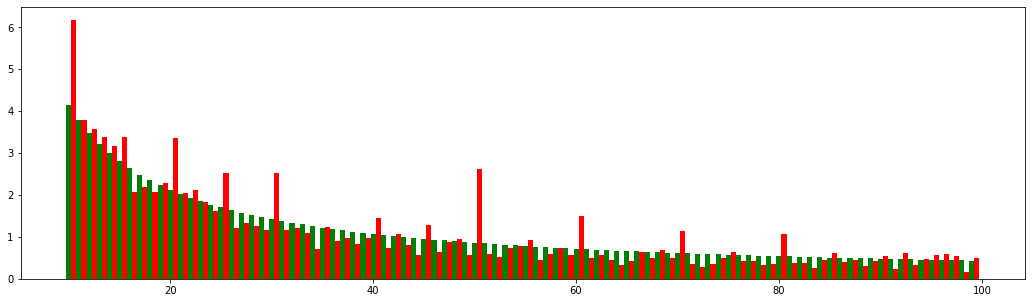

O Valor do Parametro foi:  1.3299002300917018


In [ ]:
print("-----------------")
print("| codedrome.com |")
print("| Benford's Law |")
print("-----------------\n")

benford_table = calculate_first_and_second_digits(df1['DESEMBOLSOS\n(R$)'])
print_as_table(benford_table)
print()
print_as_graph(benford_table)

soma = 0
for i in range(1,10):
   soma += (( benford_table[i-1]['data_frequency_percent'] - benford_table[i-1]['benford_frequency_percent'])**2) / benford_table[i-1]['benford_frequency_percent']

print('O Valor do Parametro foi: ', soma * 100)

## Região Nordeste e Setor Industria

In [ ]:
df2 = df[df['REGIÃO'] == 'NORDESTE            ']
df2 = df2[df2['SETOR BNDES'] == 'INDUSTRIA']
# benford's law only applies to numbers with numbers that have at least 4 digits
df2 = df2[df2['DESEMBOLSOS\n(R$)'] >= 1000]
df2.shape

(1086, 16)

In [ ]:
print("-----------------")
print("| codedrome.com |")
print("| Benford's Law |")
print("-----------------\n")

benford_table = calculate(df2['DESEMBOLSOS\n(R$)'])
print_as_table(benford_table)
print()
print_as_graph(benford_table)

soma = 0
for i in range(1,10):
   soma += (( benford_table[i-1]['data_frequency_percent'] - benford_table[i-1]['benford_frequency_percent'])**2) / benford_table[i-1]['benford_frequency_percent']

print('O Valor do Parametro foi: ', soma * 100)

-----------------
| codedrome.com |
| Benford's Law |
-----------------

-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 1 |    326 |  30.02 |    327 |  30.10 |     -1 |  -0.08 |
| 2 |    202 |  18.60 |    191 |  17.60 |     11 |   1.00 |
| 3 |    149 |  13.72 |    136 |  12.50 |     13 |   1.22 |
| 4 |    103 |   9.48 |    105 |   9.70 |     -2 |  -0.22 |
| 5 |     97 |   8.93 |     86 |   7.90 |     11 |   1.03 |
| 6 |     63 |   5.80 |     73 |   6.70 |    -10 |  -0.90 |
| 7 |     54 |   4.97 |     63 |   5.80 |     -9 |  -0.83 |
| 8 |     52 |   4.79 |     55 |   5.10 |     -3 |  -0.31 |
| 9 |     40 |   3.68 |     50 |   4.60 |    -10 |  -0.92 |
-----------------------------------------------------------

  0%       10%       20%       30%       40%       50%       60%       70%       80%  

In [ ]:
print("-----------------")
print("| codedrome.com |")
print("| Benford's Law |")
print("-----------------\n")

benford_table = calculate_second_digit(df2['DESEMBOLSOS\n(R$)'])
print_as_table(benford_table)
print()
print_as_graph(benford_table)

soma = 0
for i in range(1,10):
   soma += (( benford_table[i-1]['data_frequency_percent'] - benford_table[i-1]['benford_frequency_percent'])**2) / benford_table[i-1]['benford_frequency_percent']

print('O Valor do Parametro foi: ', soma * 100)

-----------------
| codedrome.com |
| Benford's Law |
-----------------

-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 0 |    178 |  16.39 |    130 |  12.00 |     48 |   4.39 |
| 1 |    117 |  10.77 |    124 |  11.40 |     -7 |  -0.63 |
| 2 |    112 |  10.31 |    118 |  10.90 |     -6 |  -0.59 |
| 3 |    112 |  10.31 |    113 |  10.40 |     -1 |  -0.09 |
| 4 |    112 |  10.31 |    109 |  10.00 |      3 |   0.31 |
| 5 |    116 |  10.68 |    105 |   9.70 |     11 |   0.98 |
| 6 |     93 |   8.56 |    101 |   9.30 |     -8 |  -0.74 |
| 7 |     86 |   7.92 |     98 |   9.00 |    -12 |  -1.08 |
| 8 |     96 |   8.84 |     96 |   8.80 |      0 |   0.04 |
| 9 |     64 |   5.89 |     92 |   8.50 |    -28 |  -2.61 |
-----------------------------------------------------------

  0%       10%       20%  

-----------------
| codedrome.com |
| Benford's Law |
-----------------

-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 10 |     48 |   4.42 |     45 |   4.14 |      3 |   0.28 |
| 11 |     41 |   3.78 |     41 |   3.78 |     -0 |  -0.00 |
| 12 |     33 |   3.04 |     38 |   3.48 |     -5 |  -0.44 |
| 13 |     37 |   3.41 |     35 |   3.22 |      2 |   0.19 |
| 14 |     40 |   3.68 |     33 |   3.00 |      7 |   0.69 |
| 15 |     37 |   3.41 |     30 |   2.80 |      7 |   0.60 |
| 16 |     24 |   2.21 |     29 |   2.63 |     -5 |  -0.42 |
| 17 |     26 |   2.39 |     27 |   2.48 |     -1 |  -0.09 |
| 18 |     22 |   2.03 |     26 |   2.35 |     -4 |  -0.32 |
| 19 |     18 |   1.66 |     24 |   2.23 |     -6 |  -0.57 |
| 20 |     26 |   2.39 |     23 |   2.12 |      3 |   0.28 |
| 21 |     20 | 

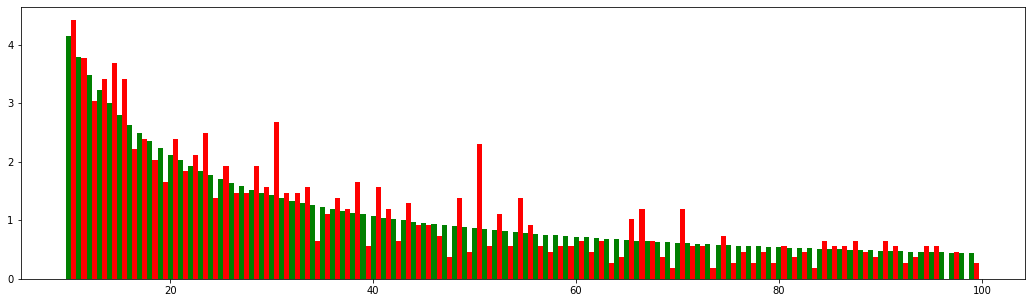

O Valor do Parametro foi:  0.48815983448525435


In [ ]:
print("-----------------")
print("| codedrome.com |")
print("| Benford's Law |")
print("-----------------\n")

benford_table = calculate_first_and_second_digits(df2['DESEMBOLSOS\n(R$)'])
print_as_table(benford_table)
print()
print_as_graph(benford_table)

soma = 0
for i in range(1,10):
   soma += (( benford_table[i-1]['data_frequency_percent'] - benford_table[i-1]['benford_frequency_percent'])**2) / benford_table[i-1]['benford_frequency_percent']

print('O Valor do Parametro foi: ', soma * 100)

## Região Nordeste e Setor Agropecuária

In [ ]:
df3 = df[df['REGIÃO'] == 'NORDESTE            ']
df3 = df3[df3['SETOR BNDES'] == 'AGROPECUÁRIA']
# benford's law only applies to numbers with numbers that have at least 4 digits
df3 = df3[df3['DESEMBOLSOS\n(R$)'] >= 1000]
df3.shape

(1564, 16)

In [ ]:
print("-----------------")
print("| codedrome.com |")
print("| Benford's Law |")
print("-----------------\n")

benford_table = calculate(df3['DESEMBOLSOS\n(R$)'])
print_as_table(benford_table)
print()
print_as_graph(benford_table)

soma = 0
for i in range(1,10):
   soma += (( benford_table[i-1]['data_frequency_percent'] - benford_table[i-1]['benford_frequency_percent'])**2) / benford_table[i-1]['benford_frequency_percent']

print('O Valor do Parametro foi: ', soma * 100)

-----------------
| codedrome.com |
| Benford's Law |
-----------------

-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 1 |    627 |  40.09 |    471 |  30.10 |    156 |   9.99 |
| 2 |    266 |  17.01 |    275 |  17.60 |     -9 |  -0.59 |
| 3 |    183 |  11.70 |    196 |  12.50 |    -12 |  -0.80 |
| 4 |    136 |   8.70 |    152 |   9.70 |    -16 |  -1.00 |
| 5 |    133 |   8.50 |    124 |   7.90 |      9 |   0.60 |
| 6 |     59 |   3.77 |    105 |   6.70 |    -46 |  -2.93 |
| 7 |     54 |   3.45 |     91 |   5.80 |    -37 |  -2.35 |
| 8 |     53 |   3.39 |     80 |   5.10 |    -27 |  -1.71 |
| 9 |     53 |   3.39 |     72 |   4.60 |    -19 |  -1.21 |
-----------------------------------------------------------

  0%       10%       20%       30%       40%       50%       60%       70%       80%  

In [ ]:
print("-----------------")
print("| codedrome.com |")
print("| Benford's Law |")
print("-----------------\n")

benford_table = calculate_second_digit(df3['DESEMBOLSOS\n(R$)'])
print_as_table(benford_table)
print()
print_as_graph(benford_table)

soma = 0
for i in range(1,10):
   soma += (( benford_table[i-1]['data_frequency_percent'] - benford_table[i-1]['benford_frequency_percent'])**2) / benford_table[i-1]['benford_frequency_percent']

print('O Valor do Parametro foi: ', soma * 100)

-----------------
| codedrome.com |
| Benford's Law |
-----------------

-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 0 |    287 |  18.35 |    188 |  12.00 |     99 |   6.35 |
| 1 |    145 |   9.27 |    178 |  11.40 |    -33 |  -2.13 |
| 2 |    190 |  12.15 |    170 |  10.90 |     20 |   1.25 |
| 3 |    147 |   9.40 |    163 |  10.40 |    -16 |  -1.00 |
| 4 |    159 |  10.17 |    156 |  10.00 |      3 |   0.17 |
| 5 |    168 |  10.74 |    152 |   9.70 |     16 |   1.04 |
| 6 |    128 |   8.18 |    145 |   9.30 |    -17 |  -1.12 |
| 7 |    107 |   6.84 |    141 |   9.00 |    -34 |  -2.16 |
| 8 |    107 |   6.84 |    138 |   8.80 |    -31 |  -1.96 |
| 9 |    126 |   8.06 |    133 |   8.50 |     -7 |  -0.44 |
-----------------------------------------------------------

  0%       10%       20%  

-----------------
| codedrome.com |
| Benford's Law |
-----------------

-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 10 |     89 |   5.69 |     65 |   4.14 |     24 |   1.55 |
| 11 |     61 |   3.90 |     59 |   3.78 |      2 |   0.12 |
| 12 |     71 |   4.54 |     54 |   3.48 |     17 |   1.06 |
| 13 |     74 |   4.73 |     50 |   3.22 |     24 |   1.51 |
| 14 |     90 |   5.75 |     47 |   3.00 |     43 |   2.76 |
| 15 |     65 |   4.16 |     44 |   2.80 |     21 |   1.35 |
| 16 |     52 |   3.32 |     41 |   2.63 |     11 |   0.69 |
| 17 |     52 |   3.32 |     39 |   2.48 |     13 |   0.84 |
| 18 |     38 |   2.43 |     37 |   2.35 |      1 |   0.08 |
| 19 |     35 |   2.24 |     35 |   2.23 |      0 |   0.01 |
| 20 |     50 |   3.20 |     33 |   2.12 |     17 |   1.08 |
| 21 |     35 | 

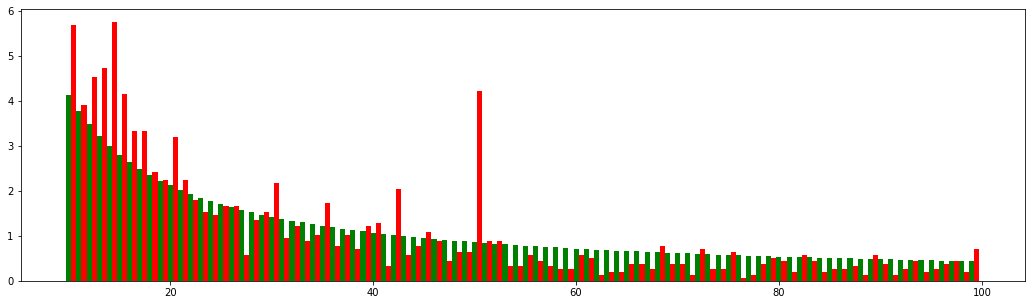

O Valor do Parametro foi:  5.284578305677353


In [ ]:
print("-----------------")
print("| codedrome.com |")
print("| Benford's Law |")
print("-----------------\n")

benford_table = calculate_first_and_second_digits(df3['DESEMBOLSOS\n(R$)'])
print_as_table(benford_table)
print()
print_as_graph(benford_table)

soma = 0
for i in range(1,10):
   soma += (( benford_table[i-1]['data_frequency_percent'] - benford_table[i-1]['benford_frequency_percent'])**2) / benford_table[i-1]['benford_frequency_percent']

print('O Valor do Parametro foi: ', soma * 100)

## Região Nordeste e Setor Infraestrutura

In [ ]:
df4 = df[df['REGIÃO'] == 'NORDESTE            ']
df4 = df4[df4['SETOR BNDES'] == 'INFRAESTRUTURA']
# benford's law only applies to numbers with numbers that have at least 4 digits
df4 = df4[df4['DESEMBOLSOS\n(R$)'] >= 1000]
df4.shape

(812, 16)

In [ ]:
print("-----------------")
print("| codedrome.com |")
print("| Benford's Law |")
print("-----------------\n")

benford_table = calculate(df4['DESEMBOLSOS\n(R$)'])
print_as_table(benford_table)
print()
print_as_graph(benford_table)

soma = 0
for i in range(1,10):
   soma += (( benford_table[i-1]['data_frequency_percent'] - benford_table[i-1]['benford_frequency_percent'])**2) / benford_table[i-1]['benford_frequency_percent']

print('O Valor do Parametro foi: ', soma * 100)

-----------------
| codedrome.com |
| Benford's Law |
-----------------

-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 1 |    204 |  25.12 |    244 |  30.10 |    -40 |  -4.98 |
| 2 |    146 |  17.98 |    143 |  17.60 |      3 |   0.38 |
| 3 |    105 |  12.93 |    102 |  12.50 |      4 |   0.43 |
| 4 |     92 |  11.33 |     79 |   9.70 |     13 |   1.63 |
| 5 |     96 |  11.82 |     64 |   7.90 |     32 |   3.92 |
| 6 |     53 |   6.53 |     54 |   6.70 |     -1 |  -0.17 |
| 7 |     35 |   4.31 |     47 |   5.80 |    -12 |  -1.49 |
| 8 |     49 |   6.03 |     41 |   5.10 |      8 |   0.93 |
| 9 |     32 |   3.94 |     37 |   4.60 |     -5 |  -0.66 |
-----------------------------------------------------------

  0%       10%       20%       30%       40%       50%       60%       70%       80%  

In [ ]:
print("-----------------")
print("| codedrome.com |")
print("| Benford's Law |")
print("-----------------\n")

benford_table = calculate_second_digit(df4['DESEMBOLSOS\n(R$)'])
print_as_table(benford_table)
print()
print_as_graph(benford_table)

soma = 0
for i in range(1,10):
   soma += (( benford_table[i-1]['data_frequency_percent'] - benford_table[i-1]['benford_frequency_percent'])**2) / benford_table[i-1]['benford_frequency_percent']

print('O Valor do Parametro foi: ', soma * 100)

-----------------
| codedrome.com |
| Benford's Law |
-----------------

-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 0 |    110 |  13.55 |     97 |  12.00 |     13 |   1.55 |
| 1 |     80 |   9.85 |     93 |  11.40 |    -13 |  -1.55 |
| 2 |     74 |   9.11 |     89 |  10.90 |    -15 |  -1.79 |
| 3 |     78 |   9.61 |     84 |  10.40 |     -6 |  -0.79 |
| 4 |     71 |   8.74 |     81 |  10.00 |    -10 |  -1.26 |
| 5 |    104 |  12.81 |     79 |   9.70 |     25 |   3.11 |
| 6 |     81 |   9.98 |     76 |   9.30 |      5 |   0.68 |
| 7 |     75 |   9.24 |     73 |   9.00 |      2 |   0.24 |
| 8 |     76 |   9.36 |     71 |   8.80 |      5 |   0.56 |
| 9 |     63 |   7.76 |     69 |   8.50 |     -6 |  -0.74 |
-----------------------------------------------------------

  0%       10%       20%  

-----------------
| codedrome.com |
| Benford's Law |
-----------------

-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 10 |     24 |   2.96 |     34 |   4.14 |    -10 |  -1.18 |
| 11 |     23 |   2.83 |     31 |   3.78 |     -8 |  -0.95 |
| 12 |     21 |   2.59 |     28 |   3.48 |     -7 |  -0.89 |
| 13 |     21 |   2.59 |     26 |   3.22 |     -5 |  -0.63 |
| 14 |     20 |   2.46 |     24 |   3.00 |     -4 |  -0.53 |
| 15 |     24 |   2.96 |     23 |   2.80 |      1 |   0.15 |
| 16 |     22 |   2.71 |     21 |   2.63 |      1 |   0.08 |
| 17 |     21 |   2.59 |     20 |   2.48 |      1 |   0.10 |
| 18 |     15 |   1.85 |     19 |   2.35 |     -4 |  -0.50 |
| 19 |     13 |   1.60 |     18 |   2.23 |     -5 |  -0.63 |
| 20 |     26 |   3.20 |     17 |   2.12 |      9 |   1.08 |
| 21 |     12 | 

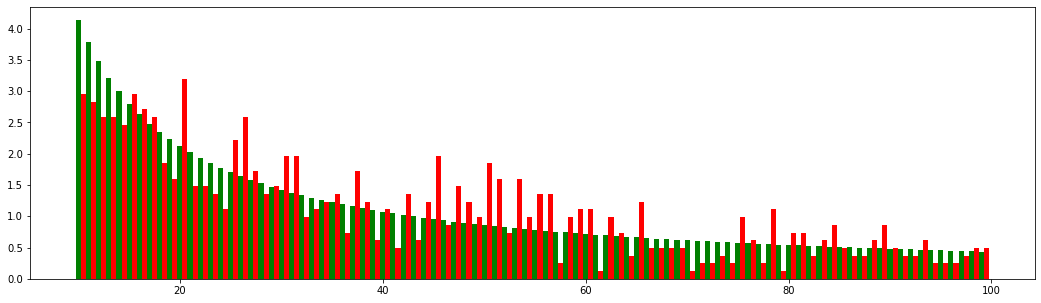

O Valor do Parametro foi:  1.1441311612260663


In [ ]:
print("-----------------")
print("| codedrome.com |")
print("| Benford's Law |")
print("-----------------\n")

benford_table = calculate_first_and_second_digits(df4['DESEMBOLSOS\n(R$)'])
print_as_table(benford_table)
print()
print_as_graph(benford_table)

soma = 0
for i in range(1,10):
   soma += (( benford_table[i-1]['data_frequency_percent'] - benford_table[i-1]['benford_frequency_percent'])**2) / benford_table[i-1]['benford_frequency_percent']

print('O Valor do Parametro foi: ', soma * 100)

## Dados Random

In [ ]:
import random

print("-----------------")
print("| codedrome.com |")
print("| Benford's Law |")
print("-----------------\n")

data = get_random_data()

print(len(data))

benford_table = calculate(data)
print_as_table(benford_table)
print()
print_as_graph(benford_table)

soma = 0
for i in range(1,10):
   soma += (( benford_table[i-1]['data_frequency_percent'] - benford_table[i-1]['benford_frequency_percent'])**2) / benford_table[i-1]['benford_frequency_percent']

print('O Valor do Parametro foi: ', soma * 100)

-----------------
| codedrome.com |
| Benford's Law |
-----------------

1000
-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 1 |    103 |  10.30 |    301 |  30.10 |   -198 | -19.80 |
| 2 |    113 |  11.30 |    176 |  17.60 |    -63 |  -6.30 |
| 3 |    111 |  11.10 |    125 |  12.50 |    -14 |  -1.40 |
| 4 |    122 |  12.20 |     97 |   9.70 |     25 |   2.50 |
| 5 |    111 |  11.10 |     79 |   7.90 |     32 |   3.20 |
| 6 |    132 |  13.20 |     67 |   6.70 |     65 |   6.50 |
| 7 |    108 |  10.80 |     58 |   5.80 |     50 |   5.00 |
| 8 |     98 |   9.80 |     51 |   5.10 |     47 |   4.70 |
| 9 |    102 |  10.20 |     46 |   4.60 |     56 |   5.60 |
-----------------------------------------------------------

  0%       10%       20%       30%       40%       50%       60%       70%       

In [ ]:
import random

print("-----------------")
print("| codedrome.com |")
print("| Benford's Law |")
print("-----------------\n")

data = get_random_data()

print(len(data))

benford_table = calculate_second_digit(data)
print_as_table(benford_table)
print()
print_as_graph(benford_table)

soma = 0
for i in range(1,10):
   soma += (( benford_table[i-1]['data_frequency_percent'] - benford_table[i-1]['benford_frequency_percent'])**2) / benford_table[i-1]['benford_frequency_percent']

print('O Valor do Parametro foi: ', soma * 100)

-----------------
| codedrome.com |
| Benford's Law |
-----------------

1000
-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 0 |     90 |   9.00 |    120 |  12.00 |    -30 |  -3.00 |
| 1 |    126 |  12.60 |    114 |  11.40 |     12 |   1.20 |
| 2 |    101 |  10.10 |    109 |  10.90 |     -8 |  -0.80 |
| 3 |     96 |   9.60 |    104 |  10.40 |     -8 |  -0.80 |
| 4 |    113 |  11.30 |    100 |  10.00 |     13 |   1.30 |
| 5 |    102 |  10.20 |     97 |   9.70 |      5 |   0.50 |
| 6 |     88 |   8.80 |     93 |   9.30 |     -5 |  -0.50 |
| 7 |     93 |   9.30 |     90 |   9.00 |      3 |   0.30 |
| 8 |     96 |   9.60 |     88 |   8.80 |      8 |   0.80 |
| 9 |     95 |   9.50 |     85 |   8.50 |     10 |   1.00 |
-----------------------------------------------------------

  0%       10%       

-----------------
| codedrome.com |
| Benford's Law |
-----------------

1000
-----------------------------------------------------------
|   |      Data       |    Benford      |    Difference   |
| n |  Freq     Pct   |  Freq     Pct   |  Freq     Pct   |
-----------------------------------------------------------
| 10 |     13 |   1.30 |     41 |   4.14 |    -28 |  -2.84 |
| 11 |     11 |   1.10 |     38 |   3.78 |    -27 |  -2.68 |
| 12 |     14 |   1.40 |     35 |   3.48 |    -21 |  -2.08 |
| 13 |     10 |   1.00 |     32 |   3.22 |    -22 |  -2.22 |
| 14 |     16 |   1.60 |     30 |   3.00 |    -14 |  -1.40 |
| 15 |     13 |   1.30 |     28 |   2.80 |    -15 |  -1.50 |
| 16 |     11 |   1.10 |     26 |   2.63 |    -15 |  -1.53 |
| 17 |     11 |   1.10 |     25 |   2.48 |    -14 |  -1.38 |
| 18 |     14 |   1.40 |     23 |   2.35 |     -9 |  -0.95 |
| 19 |     15 |   1.50 |     22 |   2.23 |     -7 |  -0.73 |
| 20 |      8 |   0.80 |     21 |   2.12 |    -13 |  -1.32 |
| 21 |     

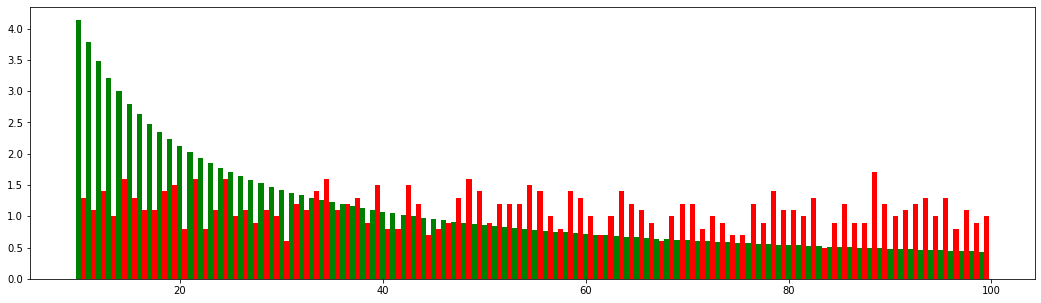

O Valor do Parametro foi:  10.117444346526968


In [ ]:
import random

print("-----------------")
print("| codedrome.com |")
print("| Benford's Law |")
print("-----------------\n")

data = get_random_data()

print(len(data))

benford_table = calculate_first_and_second_digits(data)
print_as_table(benford_table)
print()
print_as_graph(benford_table)

soma = 0
for i in range(1,10):
   soma += (( benford_table[i-1]['data_frequency_percent'] - benford_table[i-1]['benford_frequency_percent'])**2) / benford_table[i-1]['benford_frequency_percent']

print('O Valor do Parametro foi: ', soma * 100)

# Gráficos

(array([1.11553e+05, 1.30000e+01, 9.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([8.00000000e-01, 2.50534395e+08, 5.01068790e+08, 7.51603184e+08,
        1.00213758e+09, 1.25267197e+09, 1.50320637e+09, 1.75374076e+09,
        2.00427516e+09, 2.25480955e+09, 2.50534394e+09]),
 <a list of 10 Patch objects>)

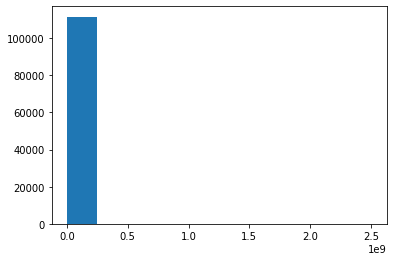

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['DESEMBOLSOS\n(R$)'])

(array([1.11553e+05, 1.30000e+01, 9.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([8.00000000e-01, 2.50534395e+08, 5.01068790e+08, 7.51603184e+08,
        1.00213758e+09, 1.25267197e+09, 1.50320637e+09, 1.75374076e+09,
        2.00427516e+09, 2.25480955e+09, 2.50534394e+09]),
 <a list of 10 Patch objects>)

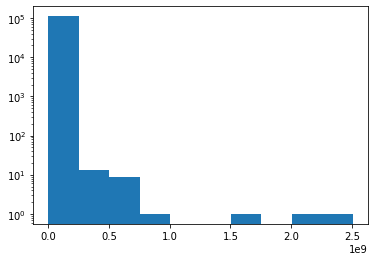

In [ ]:
plt.hist(df['DESEMBOLSOS\n(R$)'], log=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f0cc7a1cb90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0cc7e38990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0cc7e2e2d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0cc7e2e310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0cc7dbd510>,
  <matplotlib.lines.Line2D at 0x7f0cc7a1ced0>]}

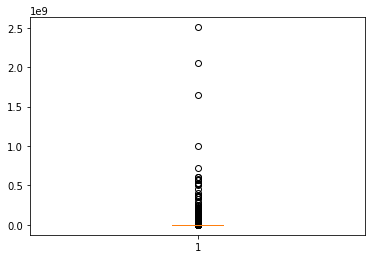

In [ ]:
plt.boxplot(df['DESEMBOLSOS\n(R$)'])

(array([1.09519e+05, 1.30000e+01, 9.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([8.00000000e-01, 2.50534395e+08, 5.01068790e+08, 7.51603184e+08,
        1.00213758e+09, 1.25267197e+09, 1.50320637e+09, 1.75374076e+09,
        2.00427516e+09, 2.25480955e+09, 2.50534394e+09]),
 <a list of 10 Patch objects>)

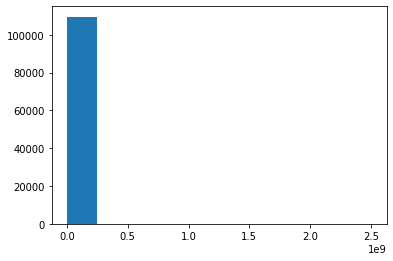

In [ ]:
plt.hist(df[df['DESEMBOLSOS\n(R$)'] != 100000]['DESEMBOLSOS\n(R$)'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f0cc79a7e90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0cc7e3b9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0cc35dd450>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0cc7e4fdd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0cc7e3bc10>,
  <matplotlib.lines.Line2D at 0x7f0cc7e3bc90>]}

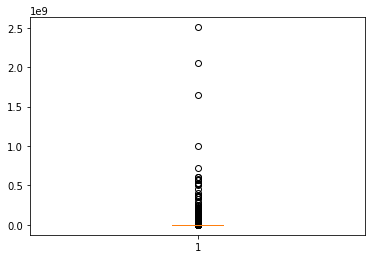

In [ ]:
plt.boxplot(df[df['DESEMBOLSOS\n(R$)'] != 100000]['DESEMBOLSOS\n(R$)'])

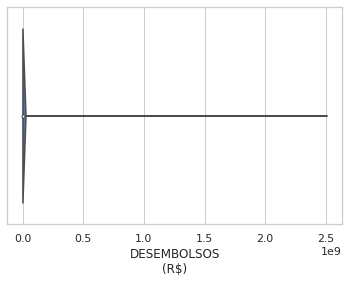

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=df['DESEMBOLSOS\n(R$)'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f0cc42c1ad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0cc42ecb90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0cc42cdbd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0cc42cd690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0cc42ec110>,
  <matplotlib.lines.Line2D at 0x7f0cc42ec650>]}

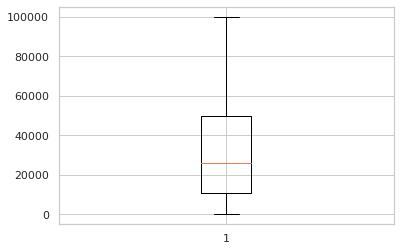

In [ ]:
plt.boxplot(df[df['DESEMBOLSOS\n(R$)']<100000]['DESEMBOLSOS\n(R$)'])

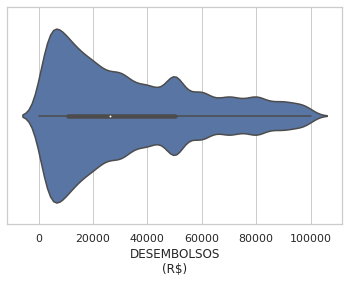

In [ ]:
sns.violinplot(x=df[df['DESEMBOLSOS\n(R$)']<100000]['DESEMBOLSOS\n(R$)'])

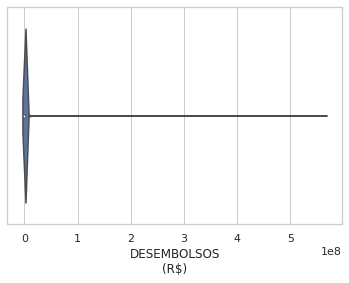

In [ ]:
sns.violinplot(x=df[df['REGIÃO'] == 'NORDESTE            ']['DESEMBOLSOS\n(R$)'])

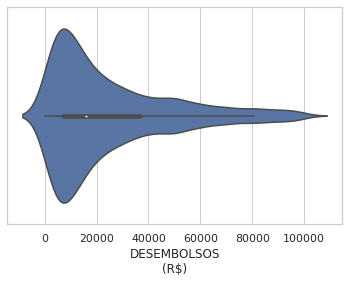

In [ ]:
sns.violinplot(x=df[np.logical_and(df['REGIÃO'] == 'NORDESTE            ',df['DESEMBOLSOS\n(R$)']<100000)]['DESEMBOLSOS\n(R$)'])

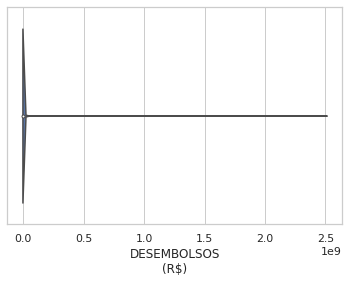

In [ ]:
sns.violinplot(x=df[df['REGIÃO'] == 'SUDESTE             ']['DESEMBOLSOS\n(R$)'])

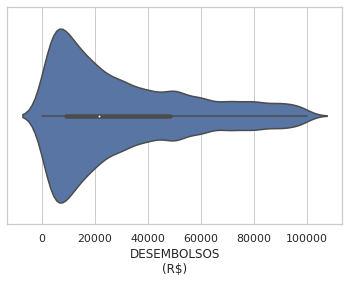

In [ ]:
sns.violinplot(x=df[np.logical_and(df['REGIÃO'] == 'SUDESTE             ', df['DESEMBOLSOS\n(R$)'] < 100000)]['DESEMBOLSOS\n(R$)'])

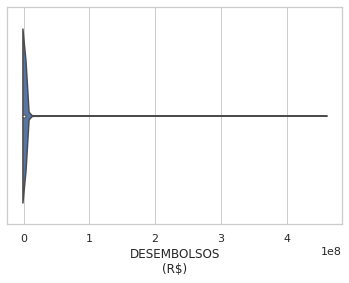

In [ ]:
sns.violinplot(x=df[df['REGIÃO'] == 'CENTRO OESTE        ']['DESEMBOLSOS\n(R$)'])

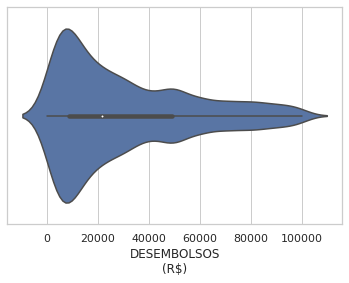

In [ ]:
sns.violinplot(x=df[np.logical_and(df['REGIÃO'] == 'CENTRO OESTE        ', df['DESEMBOLSOS\n(R$)'] < 100000)]['DESEMBOLSOS\n(R$)'])

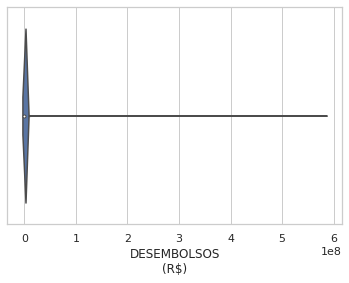

In [ ]:
sns.violinplot(x=df[df['REGIÃO'] == 'NORTE               ']['DESEMBOLSOS\n(R$)'])

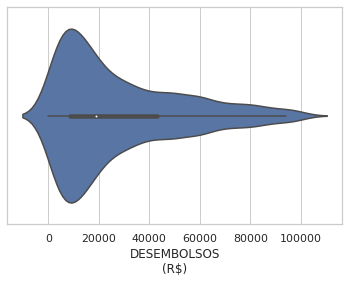

In [ ]:
sns.violinplot(x=df[np.logical_and(df['REGIÃO'] == 'NORTE               ', df['DESEMBOLSOS\n(R$)'] < 100000)]['DESEMBOLSOS\n(R$)'])

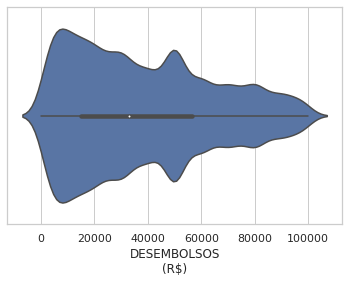

In [ ]:
sns.violinplot(x=df[np.logical_and(df['REGIÃO'] == 'SUL                 ', df['DESEMBOLSOS\n(R$)'] < 100000)]['DESEMBOLSOS\n(R$)'])

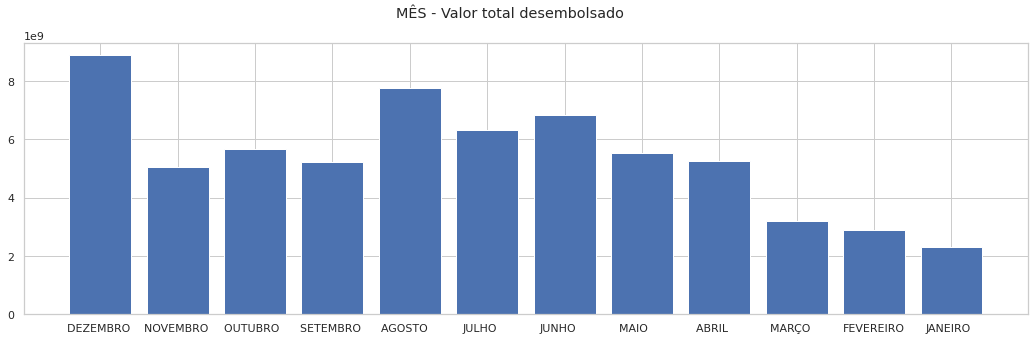

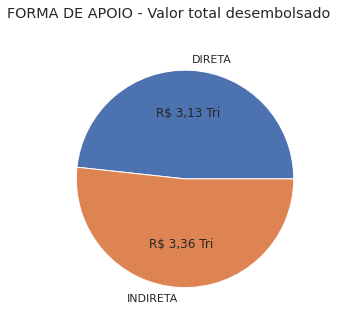

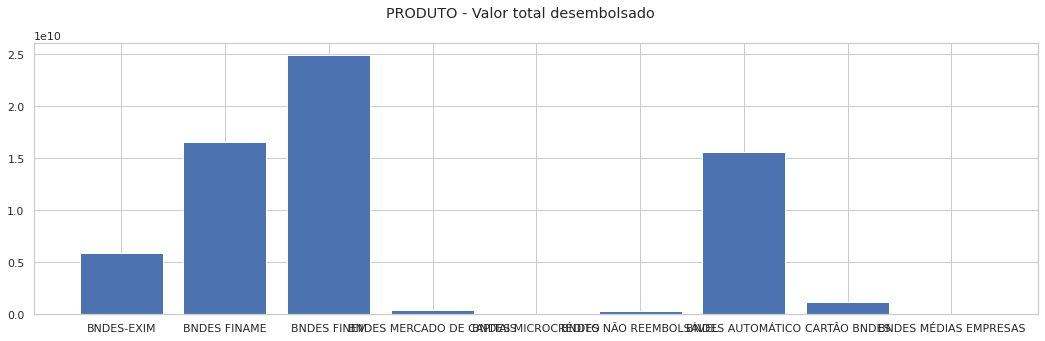

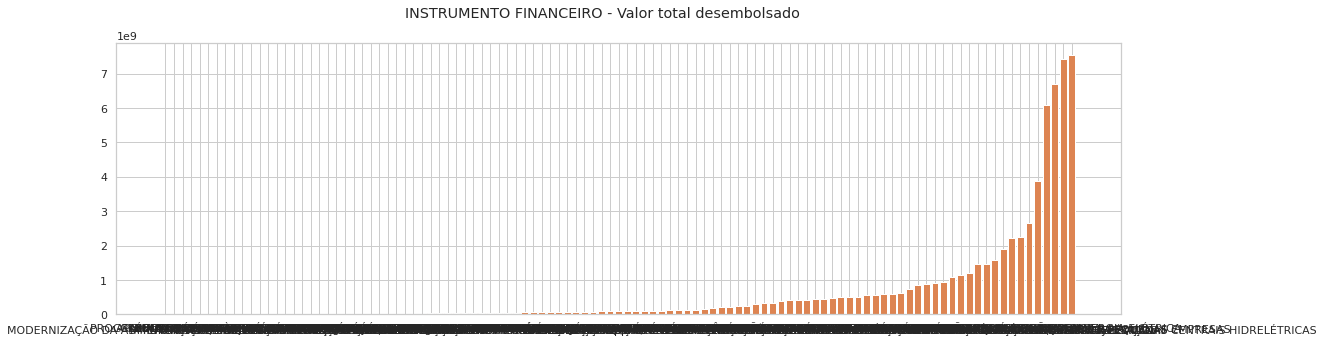

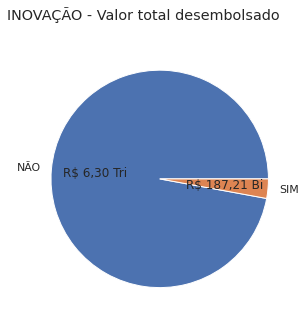

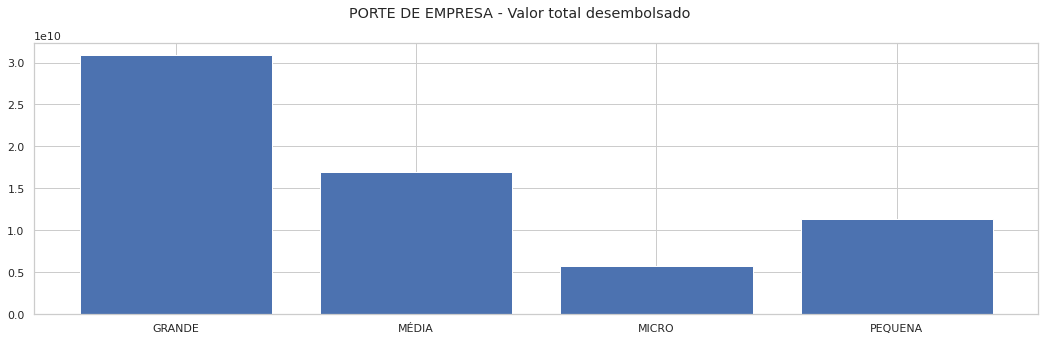

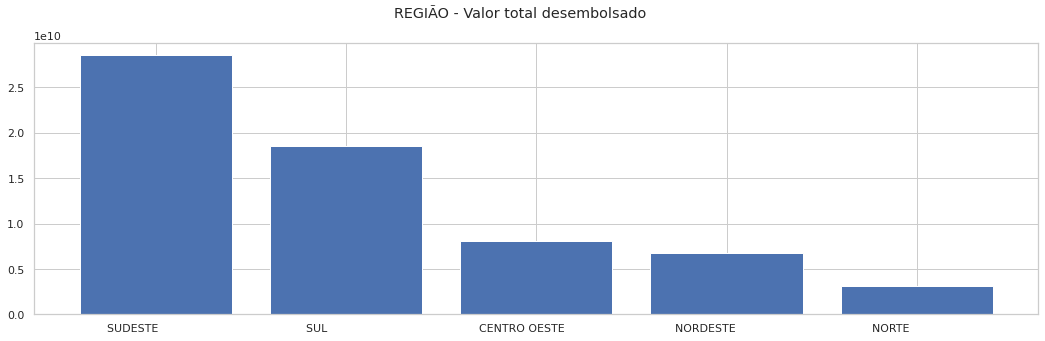

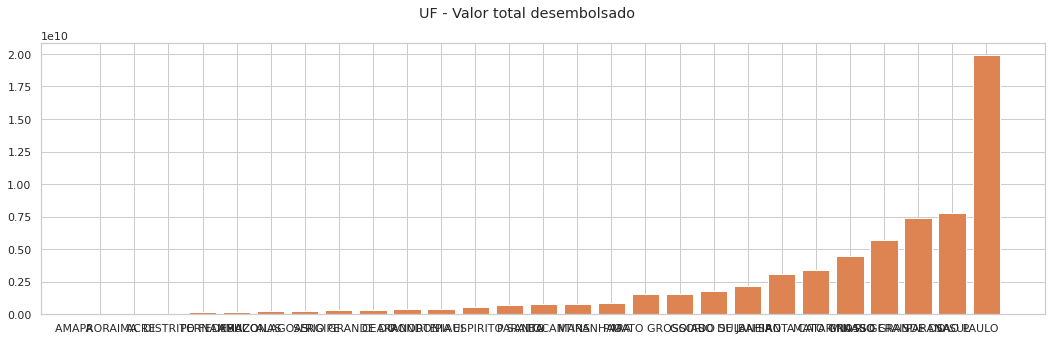

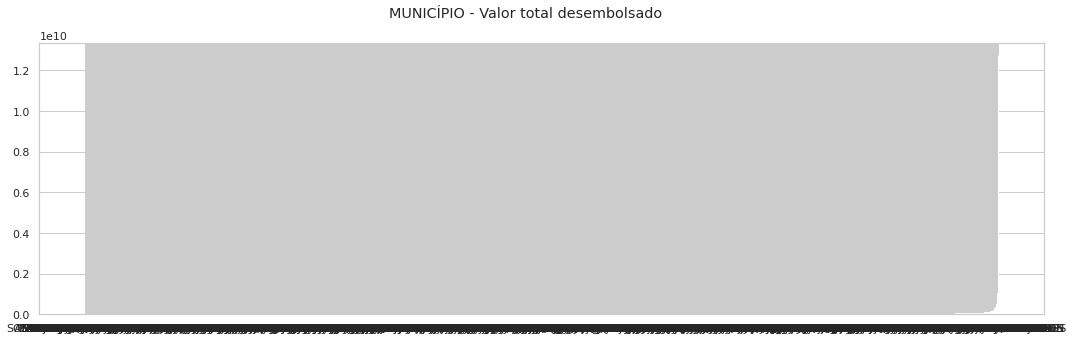

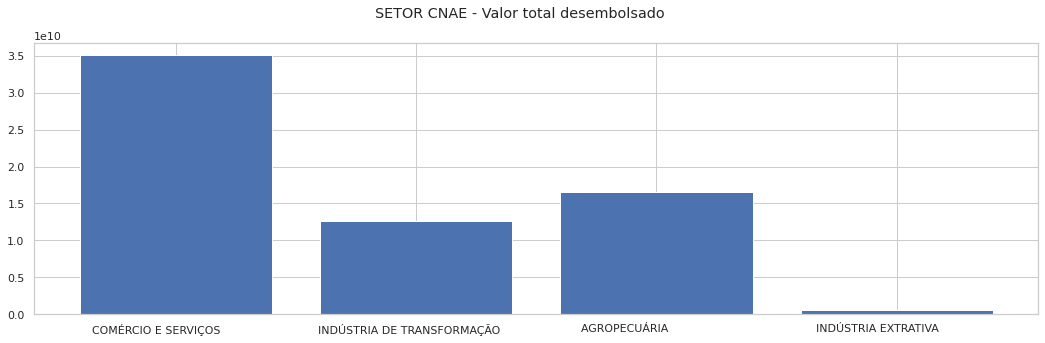

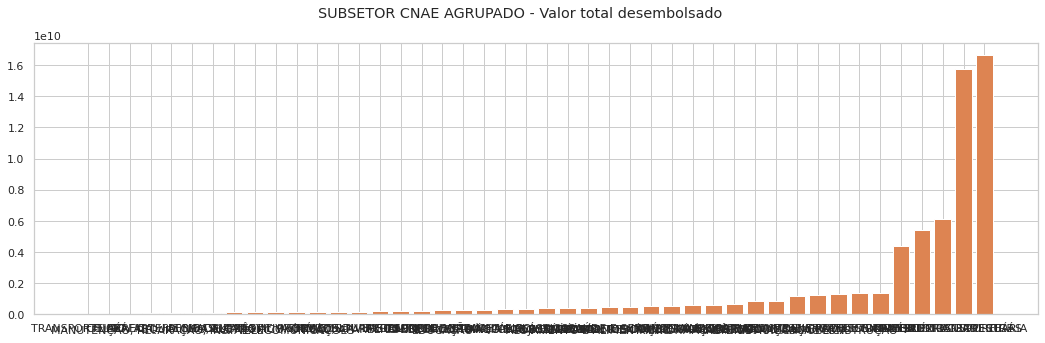

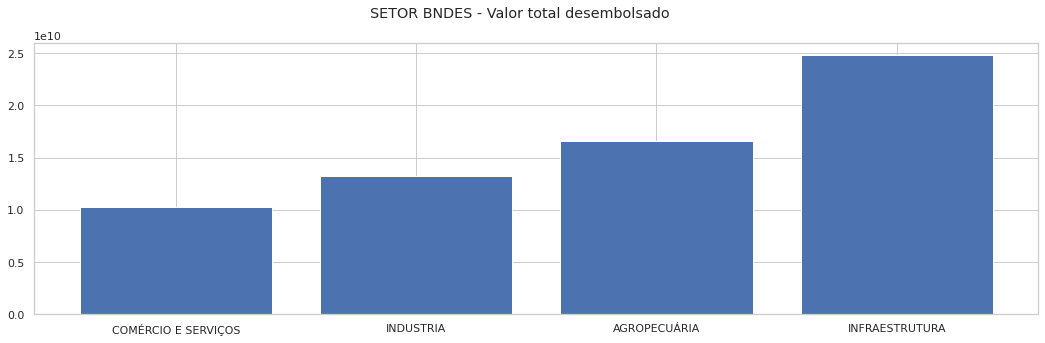

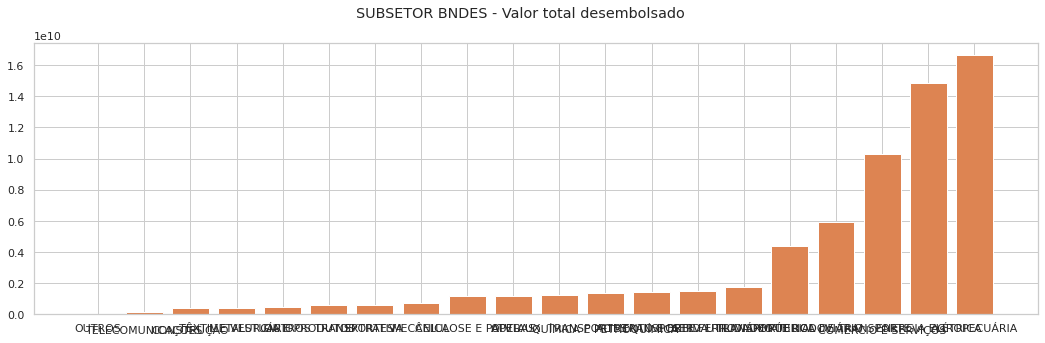

In [ ]:
order_by_column_for_columns_with_many_values = {}
for c in cat_attributes:
  fig = plt.figure(figsize=(18,5))
  fig.suptitle(c + ' - Valor total desembolsado')
  x = list(df[c].unique())
  heights = [df[df[c] == v]['DESEMBOLSOS\n(R$)'].sum() for v in x]
  if len(x) > 12:
    order = np.argsort(heights)
    order_by_column_for_columns_with_many_values[c] = order
    x = np.array(x)[order]
    heights = np.array(heights)[order]
    plt.bar(x, heights, figure=fig)
  if len(x) == 2:
    def monetary_format(percentual_value):
      total = sum(heights)
      real_value = total*percentual_value
      if real_value < 1000000:
        return ('R$ %.2f'%real_value).replace('.', ',')
      elif real_value < 1000000000:
        return ('R$ %.2f Mi'%(real_value/1000000)).replace('.', ',')
      elif real_value < 1000000000000:
        return ('R$ %.2f Bi'%(real_value/1000000000)).replace('.', ',')
      else:
        return ('R$ %.2f Tri'%(real_value/1000000000000)).replace('.', ',')
    plt.pie(x=heights, labels=x, autopct=monetary_format)
  else:
    plt.bar(x, heights, figure=fig)
  plt.show()

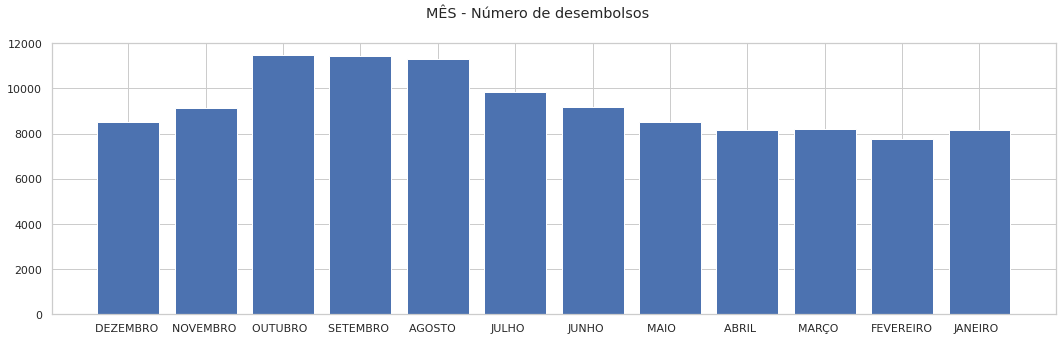

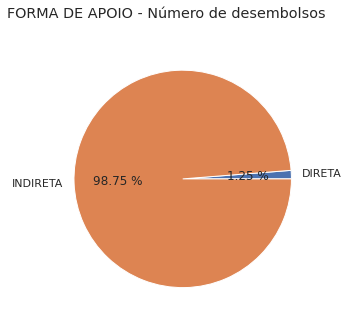

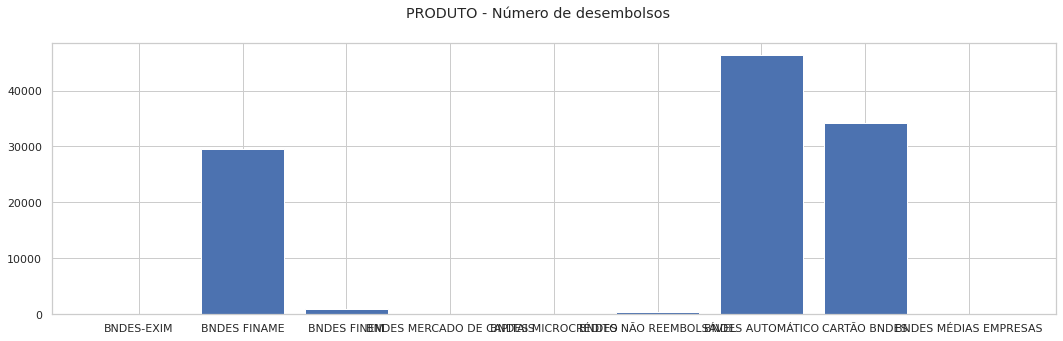

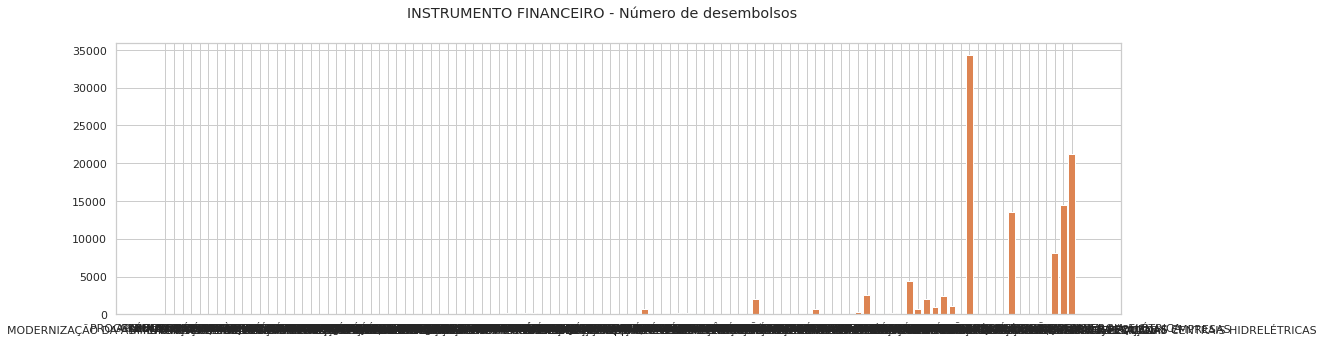

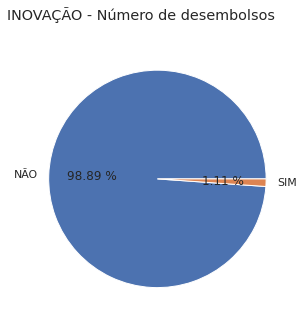

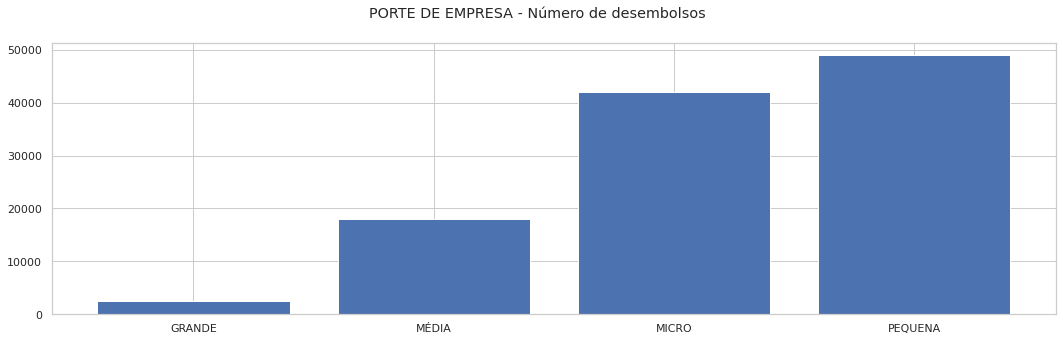

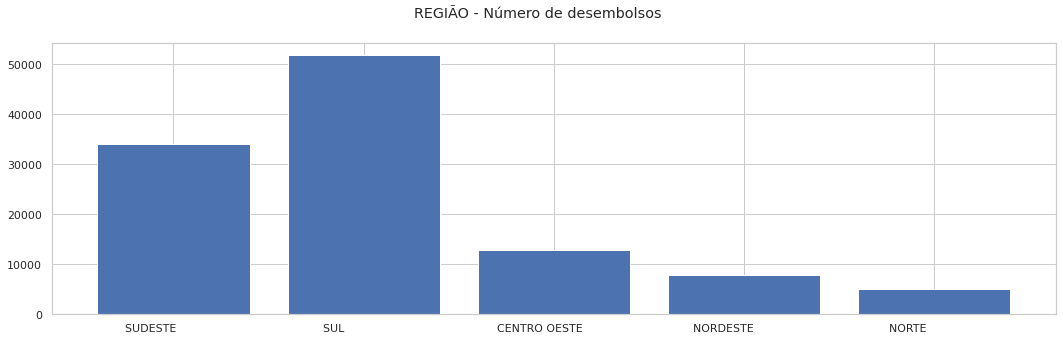

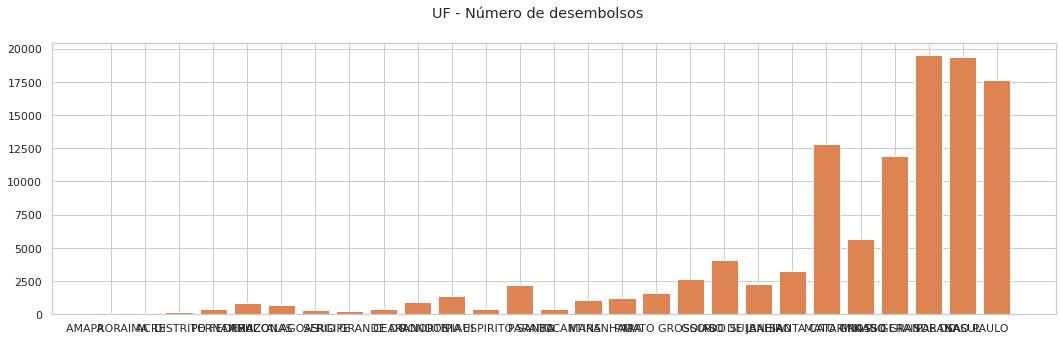

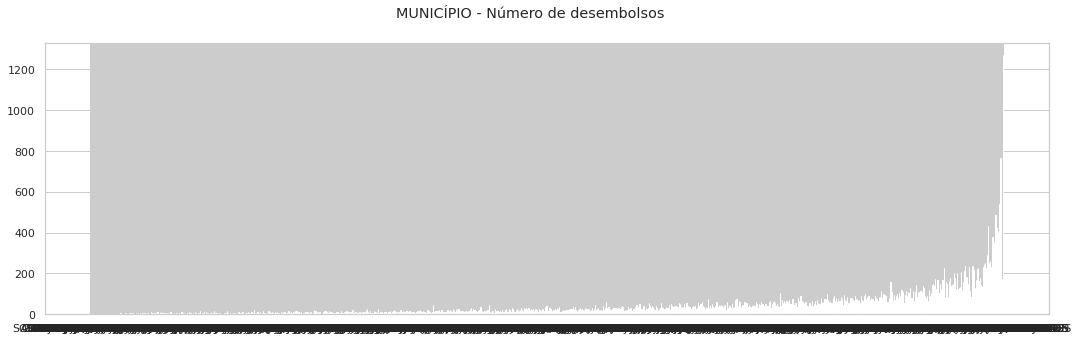

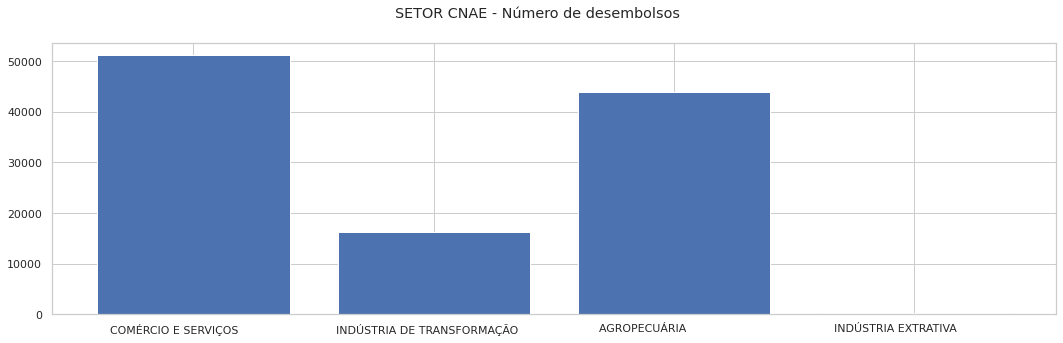

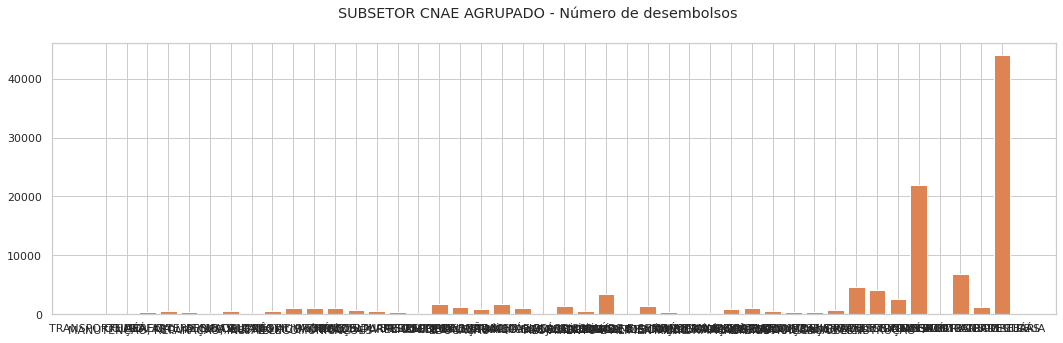

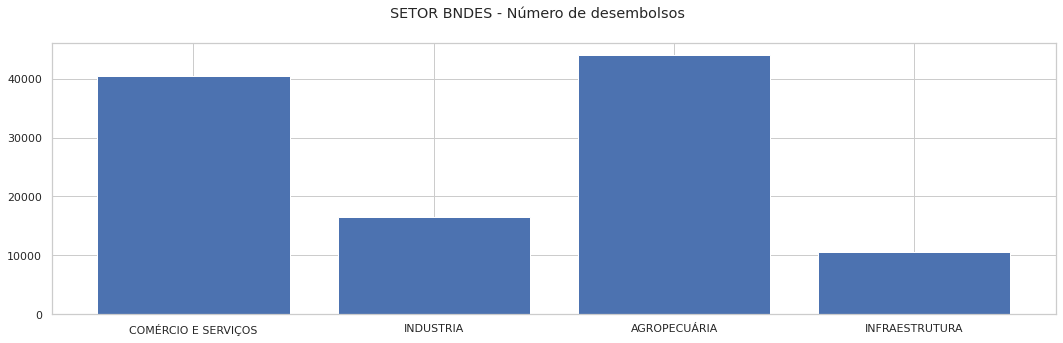

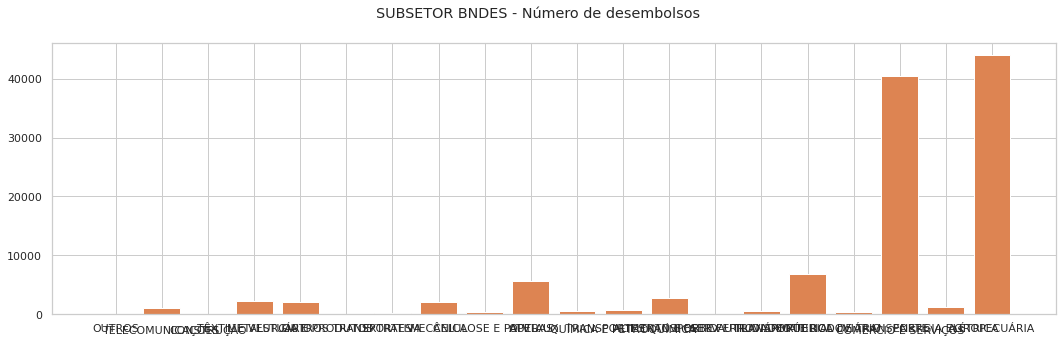

In [ ]:
for c in cat_attributes:
  fig = plt.figure(figsize=(18,5))
  fig.suptitle(c + ' - Número de desembolsos')
  x = list(df[c].unique())
  heights = [df[df[c] == v].shape[0] for v in x]
  if len(x) > 12:
    order = order_by_column_for_columns_with_many_values[c]
    x = np.array(x)[order]
    heights = np.array(heights)[order]
    plt.bar(x, heights, figure=fig)
  if len(x) == 2:
    plt.pie(x=heights, labels=x, autopct=lambda p: '{percent:.2f} %'.format(percent=round(p, 2)))
  else:
    plt.bar(x, heights, figure=fig)
  plt.show()

In [ ]:
df['DESEMBOLSOS\n(R$)'].value_counts()

100000.00    2034
50000.00     1992
200000.00    1198
150000.00    1136
30000.00      926
             ... 
5884.78         1
7713.07         1
16119.61        1
31030.19        1
8441.51         1
Name: DESEMBOLSOS\n(R$), Length: 64064, dtype: int64